In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

Data_R1=pd.read_csv("refinitiv_out_old.csv")
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
Data_R1["Date"]=Data_R1["Date"].dt.date
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


Data_R2=pd.read_csv("refinitiv_out1.csv")
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
Data_R2["Date"]=Data_R2["Date"].dt.date
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

Data_P1=pd.read_csv("platts_1.csv")

Data_P1["Date"]=Data_P1["assessDate"]

Data_P1.drop("assessDate",axis=1,inplace=True)

Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
Data_P1["Date"]=Data_P1["Date"].dt.date


Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

Data_P2=pd.read_csv("platts.csv")

Data_P2["Date"]=Data_P2["assessDate"]

Data_P2.drop("assessDate",axis=1,inplace=True)

Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
Data_P2["Date"]=Data_P2["Date"].dt.date
Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

Data_P2["Date"].dtype

Data_P3=pd.read_csv("platts_new.csv")

Data_P3["Date"]=Data_P3["assessDate"]

Data_P3.drop("assessDate",axis=1,inplace=True)

Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
Data_P3["Date"]=Data_P3["Date"].dt.date
Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

Data_A=pd.read_csv("argus_data.csv")
Data_A["Date"]=pd.to_datetime(Data_A["Date"])
Data_A["Date"]=Data_A["Date"].dt.date
Data_A["Date"]=pd.to_datetime(Data_A["Date"])

Data_A["Date"]

Data_A2=pd.read_csv("Argus_New_Data.csv")
Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
Data_A2["Date"]=Data_A2["Date"].dt.date
Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)
Data_x=pd.concat([Data_2,Data_1,Data_3],axis=0)
Data_x=Data_x.iloc[:,1:]
Data_x.reset_index(inplace=True)
Data_x=Data_x.drop_duplicates()


ffa= Data_x.loc[:,~Data_x.columns.duplicated()]


Data_P2= Data_P2.set_index('Date',)
Data_R1= Data_R1.set_index('Date') 
Data_P1= Data_P1.set_index('Date')
Data_P3= Data_P3.set_index('Date')
Data_R2= Data_R2.set_index('Date')
Data_A= Data_A.set_index('Date')
Data_A2= Data_A2.set_index('Date')
ffa= ffa.set_index('Date')

Data=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2,ffa],axis=1)

Data.reset_index(inplace=True)

Data_1 = (Data.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Data_1.head()

Data_1.set_index("Date",inplace=True)

Data_1=Data_1.fillna(method="ffill")

Data_2= Data_1.loc[:,~Data_1.columns.duplicated()]

Data_1=Data_1.fillna(method="ffill")

Data_2.shape

Data_2

Data_2=Data_2.dropna(thresh=len(Data_2)-30, axis=1)

Data_2=Data_2.fillna(method="ffill")

Data_2.isnull().sum()

Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



Target["shift_15"]=Target["Value"].shift(-15)

Data_Fin=pd.concat([Target[['shift_15','Value']],Data_2],axis=1)

Data_Fin=Data_Fin.fillna(method="ffill")

# Data_Fin.to_csv("Data_Fin.csv")

Data_Fin=Data_Fin.iloc[1:,:]



cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["shift_15"].corr(Data_Fin.iloc[:,i])

Imp_f= {k:v for k,v in cor.items() if abs(v)>.50}
len(Imp_f)

356

In [105]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

Data_F = Data_Fin[keys]

Data_F

df = Data_F.dropna(axis=1)
scaler1 = MinMaxScaler()

In [106]:
df

shift_15    Value  AAXJI03  AAXJJ03  AAXJL03  CIBCR00  CIBCR03  \
Date                                                                         
2015-01-02    7023.0   4884.0  23215.0   360.18   363.74     5.40    6.417   
2015-01-03    7023.0   4884.0  23215.0   360.18   363.74     5.40    6.417   
2015-01-04    7238.0   4884.0  23215.0   360.18   363.74     5.40    6.417   
2015-01-05    8054.0   4829.0  23215.0   360.18   363.74     5.35    6.417   
2015-01-06    9050.0   5040.0  23215.0   360.18   363.74     5.25    6.417   
...              ...      ...      ...      ...      ...      ...      ...   
2023-12-09   35711.0  35320.0  53975.0   540.69   590.52    17.15   18.223   
2023-12-10   35711.0  35320.0  53975.0   540.69   590.52    17.15   18.223   
2023-12-11   35711.0  36475.0  53975.0   540.69   590.52    17.40   18.223   
2023-12-12   35711.0  38082.0  53975.0   540.69   590.52    16.90   18.223   
2023-12-13   35711.0  35711.0  53975.0   540.69   590.52    16.65   18.223   

            CIGAJ00  CIGAJ03  CIHIT03  ...  5TC_C+1MON  5TC_C+2MON  \
Date                                   ...                           
2015-01-02     5.60    5.152   11.202  ...      8940.0      9996.0   
2015-01-03     5.60    5.152   11.202  ...      8940.0      9996.0   
2015-01-04     5.60    5.152   11.202  ...      8940.0      9996.0   
2015-01-05     5.55    5.152   11.202  ...      7444.0      9904.0   
2015-01-06     5.15    5.152   11.202  ...      7200.0      9088.0   
...             ...      ...      ...  ...         ...         ...   
2023-12-09    15.15   15.285   24.342  ...     16164.0      9900.0   
2023-12-10    15.15   15.285   24.342  ...     16164.0      9900.0   
2023-12-11    16.85   15.285   24.342  ...     15950.0      9904.0   
2023-12-12    18.80   15.285   24.342  ...     17921.0     10764.0   
2023-12-13    17.75   15.285   24.342  ...     16000.0     10168.0   

            5TC_C+3MON  5TC_C+4MON  5TC_CCURQ  5TC_C+1Q  5TC_C+4Q  5TC_C+5Q  \
Date                                                                          
2015-01-02     10580.0     11118.0     8944.0   11356.0   10565.0   13007.0   
2015-01-03     10580.0     11118.0     8944.0   11356.0   10565.0   13007.0   
2015-01-04     10580.0     11118.0     8944.0   11356.0   10565.0   13007.0   
2015-01-05     10490.0     10948.0     7876.0   10911.0   10228.0   12737.0   
2015-01-06     10240.0     10728.0     7456.0   10567.0    9945.0   12443.0   
...                ...         ...        ...       ...       ...       ...   
2023-12-09     12075.0     13736.0    27285.0   12713.0   19489.0   11643.0   
2023-12-10     12075.0     13736.0    27285.0   12713.0   19489.0   11643.0   
2023-12-11     11964.0     13857.0    27763.0   12606.0   19625.0   11779.0   
2023-12-12     12604.0     14600.0    28734.0   13763.0   19986.0   12136.0   
2023-12-13     12107.0     14350.0    28207.0   12758.0   19714.0   11943.0   

            5TC_C+1CAL  5TC_C+2CAL  
Date                                
2015-01-02     13522.0     14510.0  
2015-01-03     13522.0     14510.0  
2015-01-04     13522.0     14510.0  
2015-01-05     13441.0     14420.0  
2015-01-06     13108.0     14228.0  
...                ...         ...  
2023-12-09     16750.0     16171.0  
2023-12-10     16750.0     16171.0  
2023-12-11     16821.0     16200.0  
2023-12-12     17534.0     16554.0  
2023-12-13     17030.0     16271.0  

[3268 rows x 330 columns]

In [107]:
df=scaler1.fit_transform(df)

In [149]:
l=[]
for i in range(0,df.shape[0]):  
    l.append(df[:][i][0])

In [152]:
len(l)

3268

In [153]:
# Split into input features and target variable
X = df[:][1:]
y = l

# Step 2: Design your encoder-decoder architecture
# Define input shape
# Step 3: Preprocess your data
# Normalize input features


Xt_scaled = X[:-565]
yt_scaled = y[:-565]
Xtv_scaled = X[-565:-365]
ytv_scaled = y[-565:-365]

X_test = X[-365:]
y_test = y[-365:]

In [19]:
Xt_scaled = Xt_scaled[:, :, np.newaxis]
Xtv_scaled = Xtv_scaled[:, :, np.newaxis]


In [20]:
X_test_s=X_test[:, :, np.newaxis]

In [21]:
X_test[1].shape

(329,)

In [22]:
X_test_s[1].shape

(329, 1)

In [23]:
yt_scaled=yt_scaled[:, :, np.newaxis]
ytv_scaled_scaled=ytv_scaled[:, :, np.newaxis]
y_test=y_test[:, :, np.newaxis]

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate some sample data (time series)
def generate_data(n_samples=1000, n_timesteps=100):
    X = np.random.randn(n_samples, n_timesteps, 1)
    y = np.roll(X, -30, axis=1)  # Shifted by -30 time steps
    return X, y

# Create a simple encoder-decoder model
def create_model(input_shape):
    encoder_inputs = keras.Input(shape=input_shape)
    encoder = layers.LSTM(64, return_state=True)
    _, state_h, state_c = encoder(encoder_inputs)

    decoder_inputs = layers.RepeatVector(input_shape[0])(state_h)

    decoder_lstm = layers.LSTM(64, return_sequences=True)(decoder_inputs)
    decoder_outputs = layers.TimeDistributed(layers.Dense(1))(decoder_lstm)

    model = keras.Model(encoder_inputs, decoder_outputs)
    return model


# Create model
model = create_model(input_shape=Xt_scaled.shape[1:])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(Xt_scaled, yt_scaled, epochs=3, batch_size=32, validation_data=(Xtv_scaled, ytv_scaled))


Epoch 1/3
85/85 [==============================] - 63s 692ms/step - loss: 0.0085 - val_loss: 0.1685
Epoch 2/3
85/85 [==============================] - 60s 710ms/step - loss: 0.0065 - val_loss: 0.1438
Epoch 3/3
85/85 [==============================] - 60s 705ms/step - loss: 0.0056 - val_loss: 0.1266


In [25]:
yp=model.predict(X_test)

12/12 [==============================] - 3s 162ms/step


In [35]:
c=yp.squeeze(axis=-1)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [33]:
y_test.shape

(365, 1, 1)

In [28]:
predictions = scaler2.inverse_transform(yp.reshape(-1, 1)).reshape(yp.shape)

In [30]:
predictions

(329, 1)

In [147]:
l=[]
for i in range(yp.shape[0]) :  
    l.append(yp[i][-1].mean())

In [17]:
 Xt_scaled.shape

(2703, 329, 1)

<AxesSubplot:>

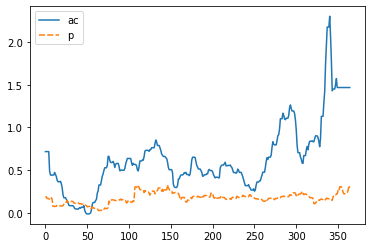

In [149]:
import seaborn as sns

x=pd.DataFrame()
x["ac"]=y_test.reshape(-1)
x["p"]=l
sns.lineplot(data=x)

In [119]:
yp.reshape(y_test.shape)

ValueError: cannot reshape array of size 120085 into shape (365,1)

In [121]:
yp

array([[[0.05862219],
        [0.09351172],
        [0.11853127],
        ...,
        [0.18812853],
        [0.18812853],
        [0.18812853]],

       [[0.05853478],
        [0.09346249],
        [0.11859404],
        ...,
        [0.18980365],
        [0.18980365],
        [0.18980365]],

       [[0.05278897],
        [0.08349675],
        [0.10554749],
        ...,
        [0.16896002],
        [0.16896002],
        [0.16896002]],

       ...,

       [[0.08611784],
        [0.13982262],
        [0.177472  ],
        ...,
        [0.26453805],
        [0.26453805],
        [0.26453805]],

       [[0.10127536],
        [0.16607706],
        [0.21181335],
        ...,
        [0.32052046],
        [0.32052046],
        [0.32052046]],

       [[0.09504293],
        [0.15526764],
        [0.19766226],
        ...,
        [0.2975366 ],
        [0.2975366 ],
        [0.2975366 ]]], dtype=float32)

ValueError: x and y can be no greater than 2-D, but have shapes (365,) and (365, 329, 1)

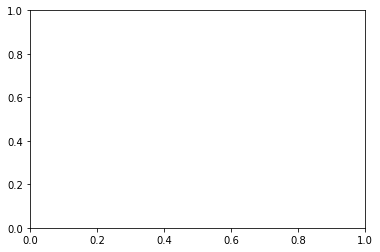

In [58]:
import matplotlib.pyplot as plt
plt.plot(yp)

In [162]:
# Split into input features and target variable
X = df[:]
y = np.array(l)

# Step 2: Design your encoder-decoder architecture
# Define input shape
# Step 3: Preprocess your data
# Normalize input features


Xt_scaled = X[:-565]
yt_scaled = y[:-565]
Xtv_scaled = X[-565:-365]
ytv_scaled = y[-565:-365]

X_test = X[-365:]
y_test = y[-365:]

In [163]:
np.array(y).shape

(3268,)

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create a basic encoder-decoder model
def create_model(input_dim, output_dim):
    encoder_inputs = keras.Input(shape=(input_dim,))
    encoder_outputs = layers.Dense(64, activation="relu")(encoder_inputs)
    
    decoder_inputs = layers.Dense(64, activation="relu")(encoder_outputs)
    decoder_outputs = layers.Dense(output_dim)(decoder_inputs)
    
    model = keras.Model(encoder_inputs, decoder_outputs)
    return model

# Generate sample data


# Split data into training and validation sets
X_train, X_val = Xt_scaled,Xtv_scaled
y_train, y_val = yt_scaled, ytv_scaled

# Create model
model = create_model(input_dim=X_train.shape[1], output_dim=1)

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/30
85/85 [==============================] - 1s 5ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 3/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 4/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 6/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 7/30
85/85 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0195
Epoch 8/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 9/30
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 10/30
85/85 [==============================] - 0s 2ms/step - loss: 8.7416e-04 - val_loss: 0.0043
Epoch 11/30
85/

In [165]:
predicted=model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [166]:
y_train.shape

(2703,)

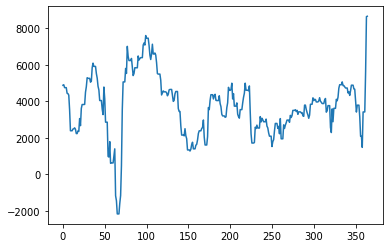

In [167]:
import matplotlib.pyplot as plt
plt.plot(actualvalue)

In [168]:
actualvalue = scaler2.inverse_transform(predicted)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [169]:
actualvalue.shape

(365, 1)

In [170]:
predictedvalue = scaler1.inverse_transform(predicted)

ValueError: non-broadcastable output operand with shape (365,1) doesn't match the broadcast shape (365,330)

In [171]:
pd.DataFrame(y[-365:])

0
0    0.197298
1    0.197298
2    0.197298
3    0.197298
4    0.197298
..        ...
360  0.396926
361  0.396926
362  0.396926
363  0.396926
364  0.396926

[365 rows x 1 columns]

In [172]:
predictedvalue = scaler2.inverse_transform(predicted)





actualVSpredicted = pd.DataFrame(
            {'Actual': y[-365:],
             'Predicted':predictedvalue.reshape(-1)
            })

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [173]:
predictedvalue.reshape(-1)

array([ 4872.843  ,  4901.1606 ,  4742.225  ,  4742.225  ,  4742.225  ,
        4432.3784 ,  4414.5386 ,  4330.5605 ,  3524.556  ,  2379.322  ,
        2379.322  ,  2379.322  ,  2474.1223 ,  2485.9983 ,  2538.2822 ,
        2460.1045 ,  2224.3936 ,  2224.3936 ,  2371.543  ,  2342.867  ,
        3047.6367 ,  2658.001  ,  3603.3096 ,  3816.8635 ,  3816.8635 ,
        3816.8635 ,  3824.1162 ,  4491.577  ,  4794.6147 ,  5286.075  ,
        5251.1807 ,  5251.1807 ,  5251.1807 ,  5040.227  ,  5103.615  ,
        5836.2744 ,  6084.445  ,  5904.8154 ,  5904.8154 ,  5904.8154 ,
        5517.324  ,  5259.6494 ,  4814.155  ,  4618.674  ,  4036.351  ,
        4036.351  ,  4036.351  ,  3556.4897 ,  3264.2754 ,  4775.4897 ,
        4131.023  ,  2850.1938 ,  2850.1938 ,  2850.1938 ,   972.79486,
         938.51105,  1785.331  ,   595.0428 ,   615.3405 ,   615.3405 ,
         615.3405 ,  1002.14233,  1387.9324 , -1182.1693 , -1456.1041 ,
       -2177.4995 , -2177.4995 , -2177.4995 , -1599.8485 , -1171

<AxesSubplot:xlabel='Date'>

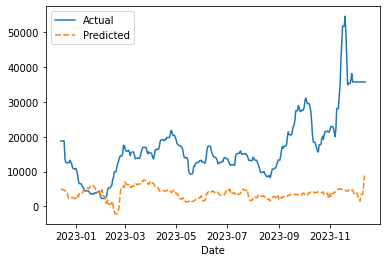

In [174]:
import seaborn as sns

sns.lineplot(data=actualVSpredicted)

In [103]:
actualVSpredicted

Actual    Predicted
Date                            
2022-12-14  18749.0  4872.842773
2022-12-15  18749.0  4901.160645
2022-12-16  18749.0  4742.225098
2022-12-17  18749.0  4742.225098
2022-12-18  18749.0  4742.225098
...             ...          ...
2023-12-09  35711.0  3410.082520
2023-12-10  35711.0  3410.082520
2023-12-11  35711.0  5606.793945
2023-12-12  35711.0  8632.182617
2023-12-13  35711.0  8654.090820

[365 rows x 2 columns]